Importing the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

specify the value of the precision parameter equal to 2 to display two decimal signs

In [ ]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

OptionError: Pattern matched multiple keys

Dataset exploration

In [9]:
df = pd.read_csv('/content/bank-additional.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Let's look at the dataset size, feature names and their types

In [11]:
df.shape
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


Attributing information

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

DataFrame features (columns)

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

the main statistical characteristics of the dataset

In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


statistics on non-numeric features

In [15]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


the target feature (y) distribution

In [16]:
df["y"].value_counts()

,count
y,
no,3668
yes,451


the client distribution by the variable marital

In [17]:
df["marital"].value_counts(normalize = True)

,proportion
marital,
married,0.609128
single,0.279922
divorced,0.108279
unknown,0.002671


Sorting

In [18]:
df.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2231,31,technician,married,professional.course,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
1546,46,admin.,divorced,high.school,no,yes,no,telephone,oct,fri,...,1,999,0,nonexistent,-0.1,93.798,-40.4,5.045,5195.8,no
1392,47,admin.,divorced,university.degree,no,yes,no,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,yes
1685,33,blue-collar,single,high.school,no,no,no,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,yes
3266,49,blue-collar,married,basic.6y,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,yes


Sort by the column group

In [19]:
df.sort_values(by = ["age", "duration"], ascending = [True, False]).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
477,18,student,single,unknown,no,no,no,cellular,sep,thu,...,1,3,1,success,-3.4,92.379,-29.8,0.809,5017.5,yes
899,18,student,single,unknown,no,yes,yes,telephone,aug,wed,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.900,4991.6,no
1661,18,student,single,unknown,no,yes,no,cellular,may,thu,...,1,7,2,success,-1.8,93.876,-40.0,0.677,5008.7,no
1887,19,student,single,high.school,unknown,yes,no,cellular,may,tue,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
3268,20,blue-collar,single,high.school,no,yes,no,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no


Application of functions: apply, map etc.

Apply the function to each column:

In [20]:
df.apply(np.max)

,0
age,88
job,unknown
marital,unknown
education,unknown
default,yes
housing,yes
loan,yes
contact,telephone
month,sep
day_of_week,wed


Apply the function to each column cell

In [21]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


Indexing and extracting data

In [22]:
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 10.9%


The mean values ​​of numerical features among the attracted clients?

In [23]:
df[df["y"] == 1].mean()

TypeError: Could not convert ['blue-collartechniciantechniciantechnicianadmin.admin.blue-collartechnicianservicestechnicianservicesadmin.entrepreneurretiredadmin.retiredblue-collartechnicianhousemaidunemployedadmin.admin.blue-collarblue-collarblue-collarretiredadmin.servicestechnicianadmin.blue-collartechniciantechnicianretiredblue-collaradmin.retiredadmin.technicianunemployedblue-collarblue-collarhousemaidretiredself-employedblue-collarstudenttechniciantechnicianentrepreneurblue-collarmanagementunknownretiredadmin.studentunemployedtechnicianmanagementtechniciantechnicianmanagementstudenttechnicianservicesadmin.servicesadmin.blue-collarstudentstudenttechniciantechnicianunemployedtechnicianretiredentrepreneurretiredtechnicianservicesblue-collaradmin.admin.housemaidtechnicianretiredadmin.technicianservicesadmin.blue-collaradmin.studentunknownmanagementadmin.admin.technicianblue-collarmanagementstudentblue-collarunemployedtechnicianblue-collarmanagementadmin.admin.admin.admin.admin.servicesself-employedmanagementblue-collartechnicianunknownadmin.admin.blue-collarblue-collarunemployedtechnicianadmin.managementadmin.admin.retiredmanagementretiredadmin.unemployedadmin.technicianadmin.admin.admin.admin.admin.unemployedretiredblue-collartechniciantechnicianhousemaidblue-collarblue-collarunemployedretiredretiredservicesblue-collarservicesadmin.technicianretiredadmin.blue-collarservicesadmin.admin.retiredblue-collarstudentadmin.blue-collaradmin.servicesadmin.admin.servicestechnicianadmin.blue-collarmanagementblue-collartechnicianadmin.admin.blue-collartechnicianentrepreneurblue-collaradmin.managementretiredtechnicianself-employedself-employedunemployedtechniciantechniciantechnicianself-employedunemployedretiredtechnicianstudentadmin.admin.unemployedadmin.admin.unemployedadmin.blue-collaradmin.admin.blue-collartechniciantechnicianadmin.retiredblue-collaradmin.servicesretiredtechnicianadmin.admin.admin.managementadmin.admin.retiredadmin.unemployedblue-collaradmin.techniciantechnicianadmin.studentadmin.technicianadmin.housemaidblue-collarservicestechnicianadmin.managementblue-collarservicesmanagementhousemaidmanagementtechnicianblue-collarstudentservicestechnicianadmin.blue-collartechnicianadmin.technicianadmin.admin.admin.admin.technicianblue-collarself-employedblue-collartechnicianentrepreneuradmin.servicesadmin.entrepreneurmanagementadmin.servicestechnicianadmin.technicianadmin.retiredadmin.admin.admin.admin.servicesadmin.servicesstudentblue-collarservicesadmin.servicesadmin.managementadmin.technicianadmin.admin.servicestechnicianblue-collartechnicianblue-collarretiredtechnicianservicesblue-collarretiredadmin.managementservicesretiredentrepreneuradmin.technicianmanagementadmin.technicianentrepreneuradmin.blue-collarself-employedadmin.retiredblue-collaradmin.blue-collaradmin.admin.techniciantechnicianblue-collaradmin.blue-collarretiredadmin.technicianblue-collarblue-collaradmin.retiredstudentadmin.admin.studenttechnicianunemployedblue-collarservicesadmin.blue-collarhousemaidadmin.managementtechnicianadmin.managementunemployedstudenttechniciantechnicianadmin.retiredadmin.managementmanagementadmin.admin.blue-collarblue-collarservicestechnicianadmin.technicianself-employedmanagementadmin.studentblue-collarself-employedretiredservicesstudenthousemaidblue-collaradmin.admin.managementadmin.self-employedtechnicianmanagementunemployedtechnicianretiredtechnicianhousemaidunknowntechnicianadmin.admin.servicesadmin.managementretiredadmin.technicianmanagementadmin.blue-collartechniciantechnicianservicestechnicianretiredretiredadmin.servicesself-employedadmin.admin.technicianself-employedtechnicianservicesadmin.admin.housemaidtechnicianservicesadmin.self-employedadmin.servicesstudenthousemaidadmin.admin.unemployedstudentunemployedadmin.managementblue-collaradmin.retiredtechnicianretiredretiredadmin.managementadmin.'
 'marrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglesinglesinglemarriedmarrieddivorceddivorceddivorcedsinglemarriedsinglemarriedsinglemarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedsingledivorcedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedsingledivorcedsinglemarriedmarrieddivorcedsinglesinglesingledivorcedmarriedmarriedsinglemarriedsinglemarriedsingledivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarrieddivorceddivorceddivorcedmarriedsinglesinglemarriedmarriedunknowndivorcedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglesinglemarriedmarriedsinglesinglesinglemarrieddivorcedsinglemarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedsingledivorcedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglemarriedmarrieddivorceddivorcedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarrieddivorceddivorcedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglesinglesinglemarrieddivorcedsinglemarrieddivorcedmarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarriedmarriedmarriedsinglesinglesingledivorcedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglesinglesinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsingle'
 'basic.4yhigh.schoolprofessional.courseuniversity.degreeprofessional.courseunknownbasic.9yprofessional.coursehigh.schoolhigh.schoolbasic.9yuniversity.degreeuniversity.degreebasic.4yuniversity.degreehigh.schoolbasic.4yprofessional.coursebasic.4yuniversity.degreehigh.schoolunknownbasic.9ybasic.6yhigh.schoolbasic.4yuniversity.degreehigh.schoolprofessional.courseprofessional.coursebasic.9yprofessional.courseuniversity.degreebasic.9ybasic.9yuniversity.degreebasic.4yhigh.schoolprofessional.coursehigh.schoolhigh.schoolbasic.6yprofessional.courseuniversity.degreeprofessional.coursebasic.9yunknownprofessional.courseuniversity.degreebasic.4yhigh.schooluniversity.degreeunknownunknownuniversity.degreehigh.schoolbasic.4yprofessional.courseuniversity.degreebasic.9yprofessional.courseunknownuniversity.degreeuniversity.degreeprofessional.courseuniversity.degreehigh.schoolhigh.schoolbasic.9yuniversity.degreehigh.schooluniversity.degreeuniversity.degreeuniversity.degreehigh.schoolbasic.4yuniversity.degreeunknownprofessional.courseuniversity.degreebasic.9yhigh.schooluniversity.degreebasic.4yhigh.schooluniversity.degreeuniversity.degreeuniversity.degreehigh.schooluniversity.degreebasic.9yuniversity.degreehigh.schoolunknownbasic.9yuniversity.degreehigh.schooluniversity.degreebasic.9yuniversity.degreebasic.9ybasic.6ybasic.6yprofessional.coursehigh.schoolbasic.9yuniversity.degreebasic.9yuniversity.degreeuniversity.degreeuniversity.degreehigh.schoolhigh.schoolhigh.schoolbasic.6yhigh.schoolbasic.9yuniversity.degreeuniversity.degreehigh.schoolbasic.9ybasic.4yuniversity.degreehigh.schooluniversity.degreeuniversity.degreehigh.schoolbasic.4yuniversity.degreehigh.schooluniversity.degreeprofessional.courseuniversity.degreehigh.schooluniversity.degreeuniversity.degreehigh.schooluniversity.degreeuniversity.degreeprofessional.courseuniversity.degreebasic.9yuniversity.degreeuniversity.degreeunknownbasic.4ybasic.4ybasic.9ybasic.4ybasic.4yhigh.schooluniversity.degreebasic.4yhigh.schoolprofessional.coursebasic.4yuniversity.degreebasic.6yhigh.schooluniversity.degreehigh.schoolbasic.4ybasic.9yunknownuniversity.degreebasic.6yuniversity.degreehigh.schooluniversity.degreeuniversity.degreehigh.schooluniversity.degreehigh.schoolbasic.4yuniversity.degreehigh.schoolprofessional.courseuniversity.degreeuniversity.degreeunknownprofessional.courseuniversity.degreebasic.9yuniversity.degreeuniversity.degreeunknownuniversity.degreeuniversity.degreeuniversity.degreebasic.9yhigh.schooluniversity.degreeuniversity.degreeuniversity.degreeprofessional.courseprofessional.courseuniversity.degreeunknownuniversity.degreeuniversity.degreebasic.4yuniversity.degreebasic.6yuniversity.degreeuniversity.degreebasic.6yhigh.schoolhigh.schoolprofessional.courseuniversity.degreeprofessional.courseprofessional.coursebasic.4ybasic.6yhigh.schoolunknownbasic.4yuniversity.degreeuniversity.degreehigh.schooluniversity.degreebasic.9yuniversity.degreeuniversity.degreeprofessional.courseuniversity.degreeuniversity.degreebasic.9yuniversity.degreeuniversity.degreeprofessional.coursehigh.schoolhigh.schoolhigh.schooluniversity.degreehigh.schooluniversity.degreebasic.9yunknownprofessional.coursehigh.schoolhigh.schoolhigh.schooluniversity.degreeuniversity.degreeuniversity.degreeuniversity.degreeuniversity.degreebasic.9yhigh.schoolhigh.schoolprofessional.courseunknownbasic.9yprofessional.courseuniversity.degreeprofessional.courseuniversity.degreeuniversity.degreehigh.schooluniversity.degreeprofessional.coursebasic.6yuniversity.degreebasic.4yprofessional.courseunknownuniversity.degreehigh.schooluniversity.degreebasic.4yuniversity.degreehigh.schoolhigh.schooluniversity.degreehigh.schoolprofessional.coursebasic.6yhigh.schooluniversity.degreeunknownuniversity.degreeuniversity.degreeuniversity.degreeuniversity.degreehigh.schoolhigh.schoolhigh.schoolunknownuniversity.degreebasic.4yuniversity.degreehigh.schooluniversity.degreeuniversity.degreeprofessional.coursehigh.schoolunknownprofessional.coursebasic.4yuniversity.degreebasic.9yprofessional.courseunknownhigh.schoolbasic.9ybasic.4yuniversity.degreehigh.schoolbasic.9yprofessional.courseuniversity.degreeuniversity.degreeuniversity.degreeuniversity.degreeuniversity.degreehigh.schoolprofessional.courseuniversity.degreebasic.9yuniversity.degreeunknownhigh.schoolbasic.4yuniversity.degreebasic.6yprofessional.courseuniversity.degreeprofessional.coursehigh.schoolprofessional.coursehigh.schoolprofessional.coursehigh.schoolhigh.schoolprofessional.coursebasic.9ybasic.6yuniversity.degreeuniversity.degreebasic.9yuniversity.degreeuniversity.degreehigh.schoolprofessional.courseuniversity.degreebasic.9ybasic.6yhigh.schoolbasic.4yuniversity.degreehigh.schooluniversity.degreeprofessional.courseprofessional.courseuniversity.degreeprofessional.courseunknownuniversity.degreeprofessional.courseprofessional.coursebasic.4yhigh.schoolunknownuniversity.degreeuniversity.degreeuniversity.degreebasic.9ybasic.6yhigh.schoolprofessional.courseuniversity.degreehigh.schooluniversity.degreebasic.4yuniversity.degreebasic.9yhigh.schooluniversity.degreeuniversity.degreehigh.schoolhigh.schoolhigh.schoolbasic.9yuniversity.degreehigh.schoolunknownuniversity.degreebasic.9yuniversity.degreeuniversity.degreeprofessional.courseprofessional.courseprofessional.courseprofessional.coursebasic.4ybasic.4yprofessional.courseuniversity.degreeuniversity.degreehigh.schooluniversity.degreehigh.schoolprofessional.courseuniversity.degreehigh.schoolprofessional.coursebasic.9ybasic.9yuniversity.degreeuniversity.degreehigh.schooluniversity.degreehigh.schoolunknownhigh.schoolbasic.9yuniversity.degreeuniversity.degreeuniversity.degreeprofessional.coursehigh.schoolprofessional.coursehigh.schooluniversity.degreeuniversity.degreebasic.4yprofessional.coursehigh.schooluniversity.degreebasic.9yuniversity.degreeprofessional.courseuniversity.degreebasic.4yuniversity.degreehigh.schoolbasic.4yprofessional.coursehigh.schoolhigh.schooluniversity.degreebasic.6yuniversity.degreehigh.schoolprofessional.courseuniversity.degreebasic.4yuniversity.degreeuniversity.degreeuniversity.degree'
 'nononononononounknownunknownnononononononononononononononononononononononononounknownnononononononononononononononononounknownnononounknownnononononounknownnononounknownnounknownnonononononononounknownnononononononononononononononononononononononounknownnononounknownnononononounknownnonounknownnonononononounknownnounknownnononounknownnononononononononononounknownnononononounknownnononononounknownunknownunknownnononononononononononononononononononononononononounknownnononononounknownnonononononounknownnonounknownnonononononounknownnononononononononononononounknownnonononononononononounknownnonononononounknownnononononounknownnononononononononononononononononounknownnononounknownnounknownnounknownnonononononononononononononounknownnonononononononounknownnononounknownnonononounknownnonounknownnounknownnononononononounknownnonononononononononononononononounknownnononononononounknownnononononononononononounknownnononononononononononononononounknownnonononononononounknownnononononononononononononononononononounknownnonononononononononounknownnonononononononononononononononononononounknownnononononononononononononononononononononononono'
 'nonoyesyesyesyesnonoyesyesunknownnoyesnonoyesnoyesnoyesyesnonoyesyesnoyesnoyesnoyesnoyesnonoyesnoyesyesnoyesyesyesyesyesnonononoyesyesyesnoyesyesyesnonoyesnonoyesnonoyesyesnononononoyesyesyesnoyesyesyesyesnononoyesnonoyesyesyesyesnononoyesyesyesyesyesyesnonoyesyesnoyesnononoyesnoyesyesyesnoyesnoyesyesnononoyesyesunknownnononononounknownnonoyesnonoyesyesnoyesyesyesyesnononoyesnoyesnononononononoyesnoyesnononoyesyesnoyesnoyesyesyesyesnoyesyesnonoyesnonoyesyesnonoyesyesyesyesyesyesnononoyesyesnonoyesyesnonoyesyesnononoyesyesyesyesyesyesyesyesnonononononoyesyesyesyesyesyesyesyesyesyesnonoyesnoyesnonounknownyesnoyesyesnonoyesyesyesnoyesyesyesnonoyesyesyesyesyesyesyesyesyesnonounknownyesnoyesyesnoyesyesnoyesyesnonoyesyesnonoyesnoyesyesyesyesnoyesnononoyesyesnonoyesnoyesyesnononoyesyesnonononoyesnonononoyesyesyesnoyesyesnoyesnonoyesyesnoyesyesyesnonoyesnoyesnoyesnounknownyesnoyesyesyesnononoyesyesnoyesnoyesyesnonoyesunknownyesnonoyesnoyesnoyesyesnoyesyesyesyesyesyesyesyesyesyesnoyesnoyesyesyesnoyesunknownnononoyesyesnononoyesnoyesnoyesyesnonoyesnonoyesyesnononononoyesnonononoyesyesyesnonoyesnoyesyesnononoyesyesnoyesyesyesnoyesyesyesnoyesyesnoyesyesyesunknownyesyesyesyesyesyes'
 'yesnonoyesnononononoyesunknownnononononononononononononoyesnononononononononononononononoyesyesnononononononononononononononononoyesnononononoyesnonononononoyesnonoyesnoyesnonononononononononononononoyesnononoyesnoyesnonoyesnononononononoyesnononoyesnonononononoyesnounknownyesnonononounknownnononononononononoyesyesnononononoyesnonoyesnonononononononononoyesnonoyesnoyesnononononoyesnoyesnoyesnonononononononononononononoyesnononoyesyesnonononononononononononononononoyesnononoyesnonononononononononononononononononounknownnononononononononononoyesnononononoyesyesyesyesnononononounknownnoyesnoyesnonononoyesnononononononoyesnononononononononoyesnononononoyesnononononononononoyesnoyesnonononononononoyesnononononononononoyesyesnoyesnonoyesnononounknownnonoyesnononononononononononoyesyesnonounknownnonononononononononononononoyesnoyesnononononononononononounknownnononononononoyesnoyesyesnononoyesnononononononononononononononononononononononononononoyesnoyesnoyesyesyesnononononononononononounknownnoyesnononoyes'
 'cellularcellularcellularcellularcellulartelephonecellulartelephonetelephonecellulartelephonecellularcellularcellularcellularcellulartelephonecellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonetelephonecellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellulartelephonecellularcellularcellularcellulartelephonecellularcellulartelephonecellularcellularcellularcellularcellularcellulartelephonecellularcellulartelephonetelephonecellularcellularcellulartelephonecellularcellulartelephonecellularcellularcellulartelephonecellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellulartelephonecellularcellularcellularcellularcellulartelephonetelephonecellularcellularcellulartelephonecellularcellulartelephonecellularcellularcellularcellularcellulartelephonetelephonecellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellulartelephonecellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellulartelephonecellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellulartelephonecellulartelephonecellulartelephonecellularcellularcellulartelephonecellulartelephonetelephonecellularcellularcellularcellulartelephonecellulartelephonetelephonecellulartelephonecellularcellulartelephonecellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellulartelephonecellularcellularcellulartelephonecellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellulartelephonecellularcellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellulartelephonecellularcellulartelephonecellularcellularcellularcellularcellularcellulartelephonecellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellularcellulartelephonecellularcellulartelephonecellularcellularcellularcellularcellulartelephonecellularcellulartelephonecellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellularcellularcellulartelephonecellularcellularcellularcellularcellular'
 'julmaraugsepsepaprnovjunjulaugjunaugnovapraprjunjunaugsepjuloctmaraugmayjulnovaugmarjulnovaugjunjulaugmaymarmayjunaugmaynovmaynovmarmayjulsepmayoctmaymaymayjunaugjunoctjulaprjuljuljunaugjunnovapraugjulnovjunjulnovnovaugnovaugapraugsepnovdecjunoctnovsepaugjuljunoctjunjulmayaugjunaugjunnovmarsepmaymaymarmayjunaugmaymaymaymayaugaugsepmaysepaugjuldecdecjunaugmayjunjulaprjuljunnovjulmaysepsepmaynovmarnovjuljunaprjulmayjuljulmaysepjunmayjunjulmayoctjuljulmayjulmaysepmaymaymaymayjulnovaproctaugjunapraugmayaugaugjunaugaprjulnovmaymayaprmarmayaugmayjulaugjunsepjunjundecaugaproctmayjunjunjunnovmaynovaprjunjuljuldecjunmaynovmayjulnovjuldecjunnovsepjulmaymayapraugjulmayjulnovjunaugmarmayjunjunoctaugoctjunmayaugnovmayjunjuljuljulmaymarjunaugaprnovjunaugmaynovmayjulsepaugmaymayjunmaysepjunmayjuljunmarjuloctmayoctaproctmarjulaprjunmayaprjulaugdecjunmayoctnovmayoctmarjunaprmayaugaugmayoctaprnovaprjuljunaugjunaugaprjuljulnovmaymaymayaugnovmaysepmayaprjunnovsepmayjulmaroctjunjunjulmayoctjuljulmayaprmayoctsepmaymayjulapraprmarsepjulmarnovaugjunaugnovaugnovaugmarmayjunnovmayjunmayaprmaymaraprapraugaugaugaprmayaprmaymayjuljunnovmaymarmarmarapraugjunnovmaroctjundecjunmayjunaugsepmarmarjunjuljulaugdecaugaugoctaugoctmayaugmayjuljunsepmarsepmaymayaugaugjuldecjunaprjunmaynovjunmarmaymaynovaugaprmayjunjulaugnovaprnovdecaugdecjunsepjunoctmarmayaugoctmaysepoct'
 'tuemonmontuewedwedmonmonmontuethuthutuetuemontuewedthutuetuefrituefrimonmonmonthuwedthutuemonthufrituewedmonmonwedfrimonmonfrimonfrimonwedthufrithutuewedfrithumontuemontuethufrithufrifrithumonthufrituemonthufrithuwedwedthumontuethutuemonwedwedthufrimonmonthumonwedmonmontuethuwedfrituetuewedfrifrimonmonfrithutuefrifrimontuetuewedthumontuetuemonmonthuthumonfrithuthuthumonthufrithuwedwedmonmontuetuefriwedfrithuwedwedthumonfrithuwedwedtuethuwedthumonfrifrimonfrifrimonwedwedmonmonmonfriwedmontuewedwedthuwedtuewedtuewedmontuemonthutuetuetuethuwedwedthumontuefrimonwedtuethuwedwedmonwedtuefrithutuethutuewedwedmonwedthufrimonwedfriwedmonwedtuetuethutuetuethumonfrituethumonmonthutuetuewedfrithufrituethutuetuewedtuetuethumontuewedmonwedmonwedmonfrituewedthumonmonmonthufrimontuefrifrituewedthufrithuwedthuthutuetuewedmonthufrimonmonfrifriwedwedwedtuemonthuwedmonwedmonfriwedwedmonthufrithutuefrimonwedtuewedtuefrifrithuthutuefriwedfrithumonthuthuthufrituemonmonthumonthuthufriwedthumonfrituethuthufrithufriwedmonwedthutuetuethumonfrifrithumonwedwedtuethumonthuwedthuwedwedmontuemonmonfrithutuetuetuetuethufrituefrimonfrithutuethutuetuemonwedthumonfrithufrifriwedtuethufrituefrifrituefriwedthuthumonmonfrifrituetuetuefrithutuefrithumonfrithuthufriwedwedmonmonthutuefriwedwedtuefriwedfriwedtuemontuethuthutuefrifrithutuewedmonthumonfrituemonwedwedmonmonfri'
 'nonexistentsuccessnonexistentsuccessfailuresuccesssuccessnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentfailurenonexistentnonexistentnonexistentsuccesssuccesssuccesssuccesssuccessnonexistentsuccessnonexistentsuccessnonexistentnonexistentnonexistentsuccessnonexistentfailuresuccessnonexistentfailurenonexistentnonexistentsuccessnonexistentsuccesssuccesssuccesssuccessnonexistentfailurenonexistentsuccessnonexistentnonexistentnonexistentfailurenonexistentnonexistentnonexistentnonexistentfailurenonexistentnonexistentsuccessnonexistentnonexistentsuccessnonexistentfailuresuccessfailurenonexistentfailurenonexistentsuccessnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentsuccessnonexistentsuccessnonexistentnonexistentsuccessnonexistentnonexistentfailurenonexistentfailurenonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentsuccessnonexistentfailurenonexistentfailurenonexistentnonexistentfailurenonexistentnonexistentnonexistentnonexistentnonexistentfailuresuccessnonexistentnonexistentsuccessfailurenonexistentfailurefailurenonexistentnonexistentnonexistentnonexistentnonexistentfailurenonexistentnonexistentnonexistentsuccessfailurefailurenonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentfailurenonexistentsuccessnonexistentnonexistentnonexistentnonexistentsuccessnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentsuccesssuccessnonexistentnonexistentnonexistentnonexistentsuccessnonexistentnonexistentfailuresuccessnonexistentnonexistentnonexistentnonexistentnonexistentfailurefailurefailurenonexistentnonexistentnonexistentfailurenonexistentsuccessnonexistentsuccessnonexistentnonexistentnonexistentsuccessnonexistentfailurenonexistentnonexistentfailurenonexistentfailurenonexistentsuccessnonexistentsuccesssuccessfailuresuccesssuccessnonexistentnonexistentnonexistentsuccessnonexistentnonexistentsuccessnonexistentnonexistentfailurenonexistentfailurenonexistentnonexistentsuccessnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentsuccessnonexistentnonexistentsuccessnonexistentsuccessnonexistentnonexistentsuccessnonexistentnonexistentfailuresuccessnonexistentsuccessnonexistentnonexistentnonexistentnonexistentfailuresuccessnonexistentnonexistentnonexistentnonexistentnonexistentfailurenonexistentfailurenonexistentnonexistentfailuresuccessnonexistentnonexistentnonexistentnonexistentsuccesssuccessnonexistentnonexistentnonexistentnonexistentnonexistentsuccesssuccessnonexistentnonexistentfailurenonexistentnonexistentnonexistentnonexistentnonexistentfailurenonexistentnonexistentnonexistentnonexistentfailuresuccesssuccessnonexistentnonexistentfailurenonexistentnonexistentnonexistentsuccessnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentfailurenonexistentnonexistentnonexistentnonexistentnonexistentfailurenonexistentnonexistentnonexistentfailuresuccessfailurenonexistentsuccesssuccessnonexistentnonexistentnonexistentfailurenonexistentnonexistentnonexistentsuccessnonexistentfailurenonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentfailurenonexistentsuccessnonexistentfailurenonexistentnonexistentnonexistentnonexistentsuccessnonexistentfailuresuccesssuccessnonexistentsuccessfailurenonexistentnonexistentsuccessnonexistentfailuresuccessnonexistentsuccessnonexistentnonexistentnonexistentnonexistentsuccesssuccesssuccessfailurenonexistentnonexistentfailurenonexistentnonexistentnonexistentnonexistentnonexistentnonexistentfailurenonexistentnonexistentsuccessnonexistentnonexistentnonexistentnonexistentnonexistentsuccessfailurenonexistentnonexistentfailurefailurenonexistentnonexistentnonexistentsuccessfailurenonexistentnonexistentnonexistentnonexistentsuccesssuccessnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentsuccesssuccessnonexistentsuccessnonexistentfailuresuccessnonexistentnonexistentnonexistentnonexistentsuccessfailuresuccessnonexistentsuccesssuccessnonexistentsuccessnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentnonexistentfailurenonexistentnonexistentnonexistentnonexistentnonexistentfailurenonexistentnonexistentfailurenonexistentsuccessfailure'] to numeric

average call duration for the attracted clients

In [24]:
acd = round(df[df["y"] == 1]["duration"].mean(), 2)
acd_in_min = acd // 60
print("Average call duration for attracted clients =", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients = 9.0 min 20 sec


the average age of attracted (y == 1) and unmarried ('marital' == 'single') clients

In [25]:
print("Average age of attracted clients =", int(df[(df["y"] == 1) & (df["marital"] == "single")]["age"].mean()), "years")

Average age of attracted clients = 32 years


the first or last line of the DataFrame

In [26]:
df[-1:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.2,-42.0,4.12,5195.8,0


Pivot tables

build cross tabulation by the crosstab method.

In [ ]:
pd.crosstab(df["y"], df["marital"])

In [27]:
pd.crosstab(df["y"],
            df["marital"],
            normalize = 'index')

marital,divorced,married,single,unknown
y,,,,
0,0.109869,0.615322,0.272083,0.002726
1,0.095344,0.558758,0.343681,0.002217


The average age and the call duration for different types of client employment job

In [28]:
df.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean",
).head(10)

,age,duration
job,,
admin.,38.240119,261.871542
blue-collar,39.265837,261.852941
entrepreneur,42.202703,249.202703
housemaid,45.672727,229.663636
management,42.429012,246.799383
retired,60.873494,311.789157
self-employed,40.679245,254.924528
services,38.513995,232.529262
student,26.695122,287.134146


Visualization in Pandas

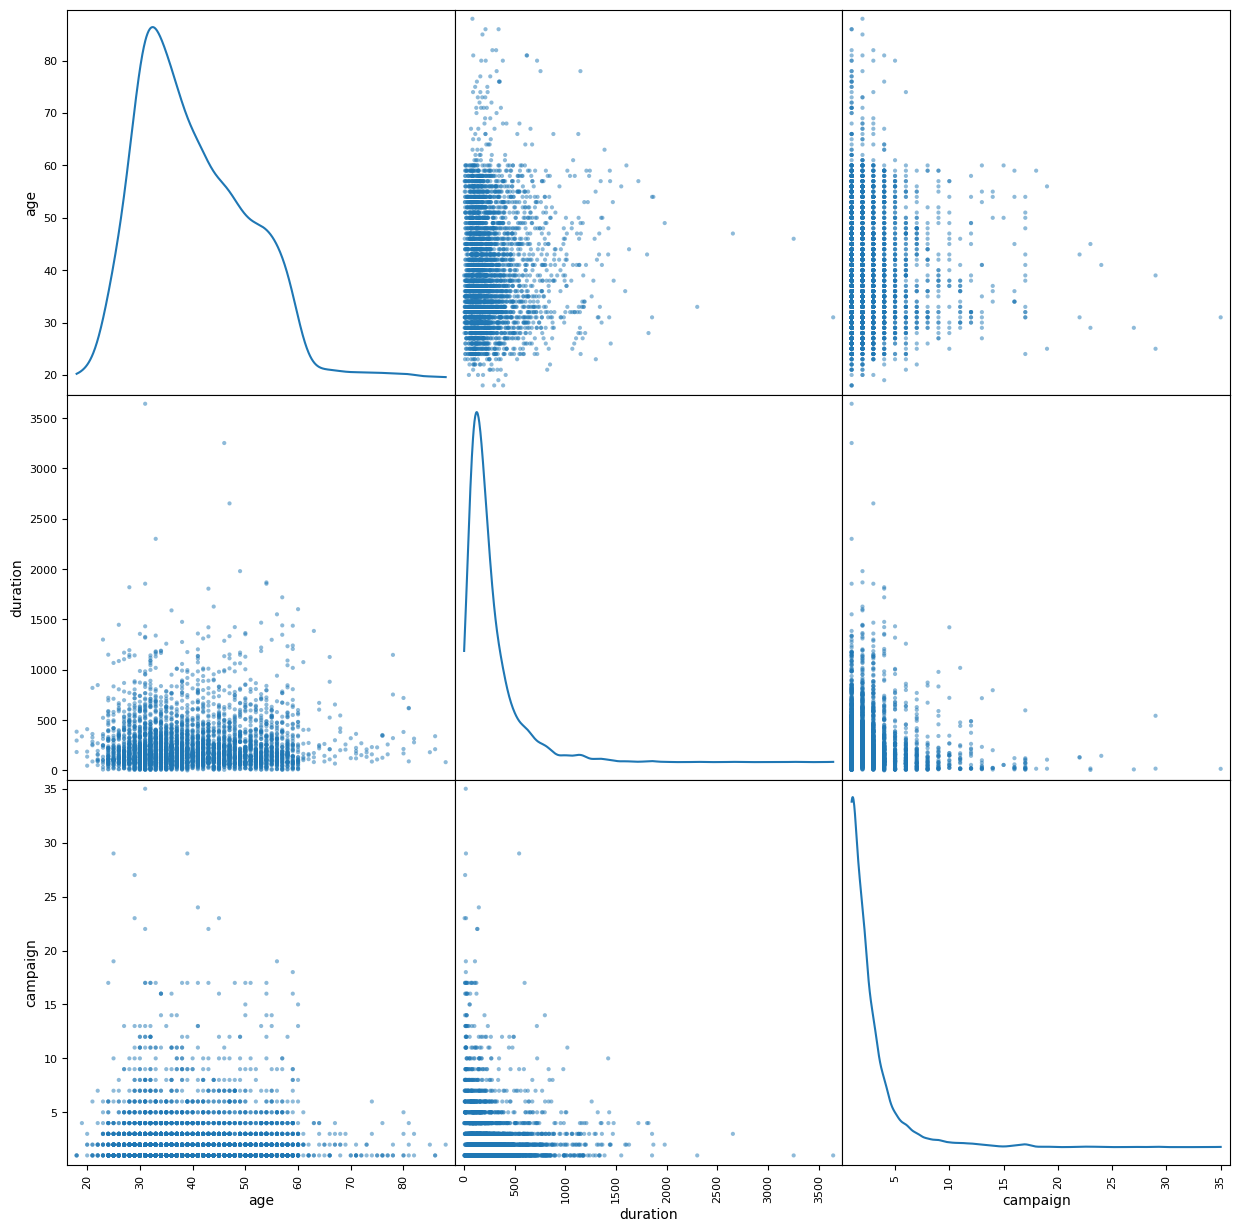

In [29]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

build a separate histogram for age feature

In [ ]:
df["age"].hist()

build histogram for features all together

In [ ]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()

In [ ]:
df.boxplot(column = "age",
           by = "marital")
plt.show()

we will try to do this by data grouping on other features

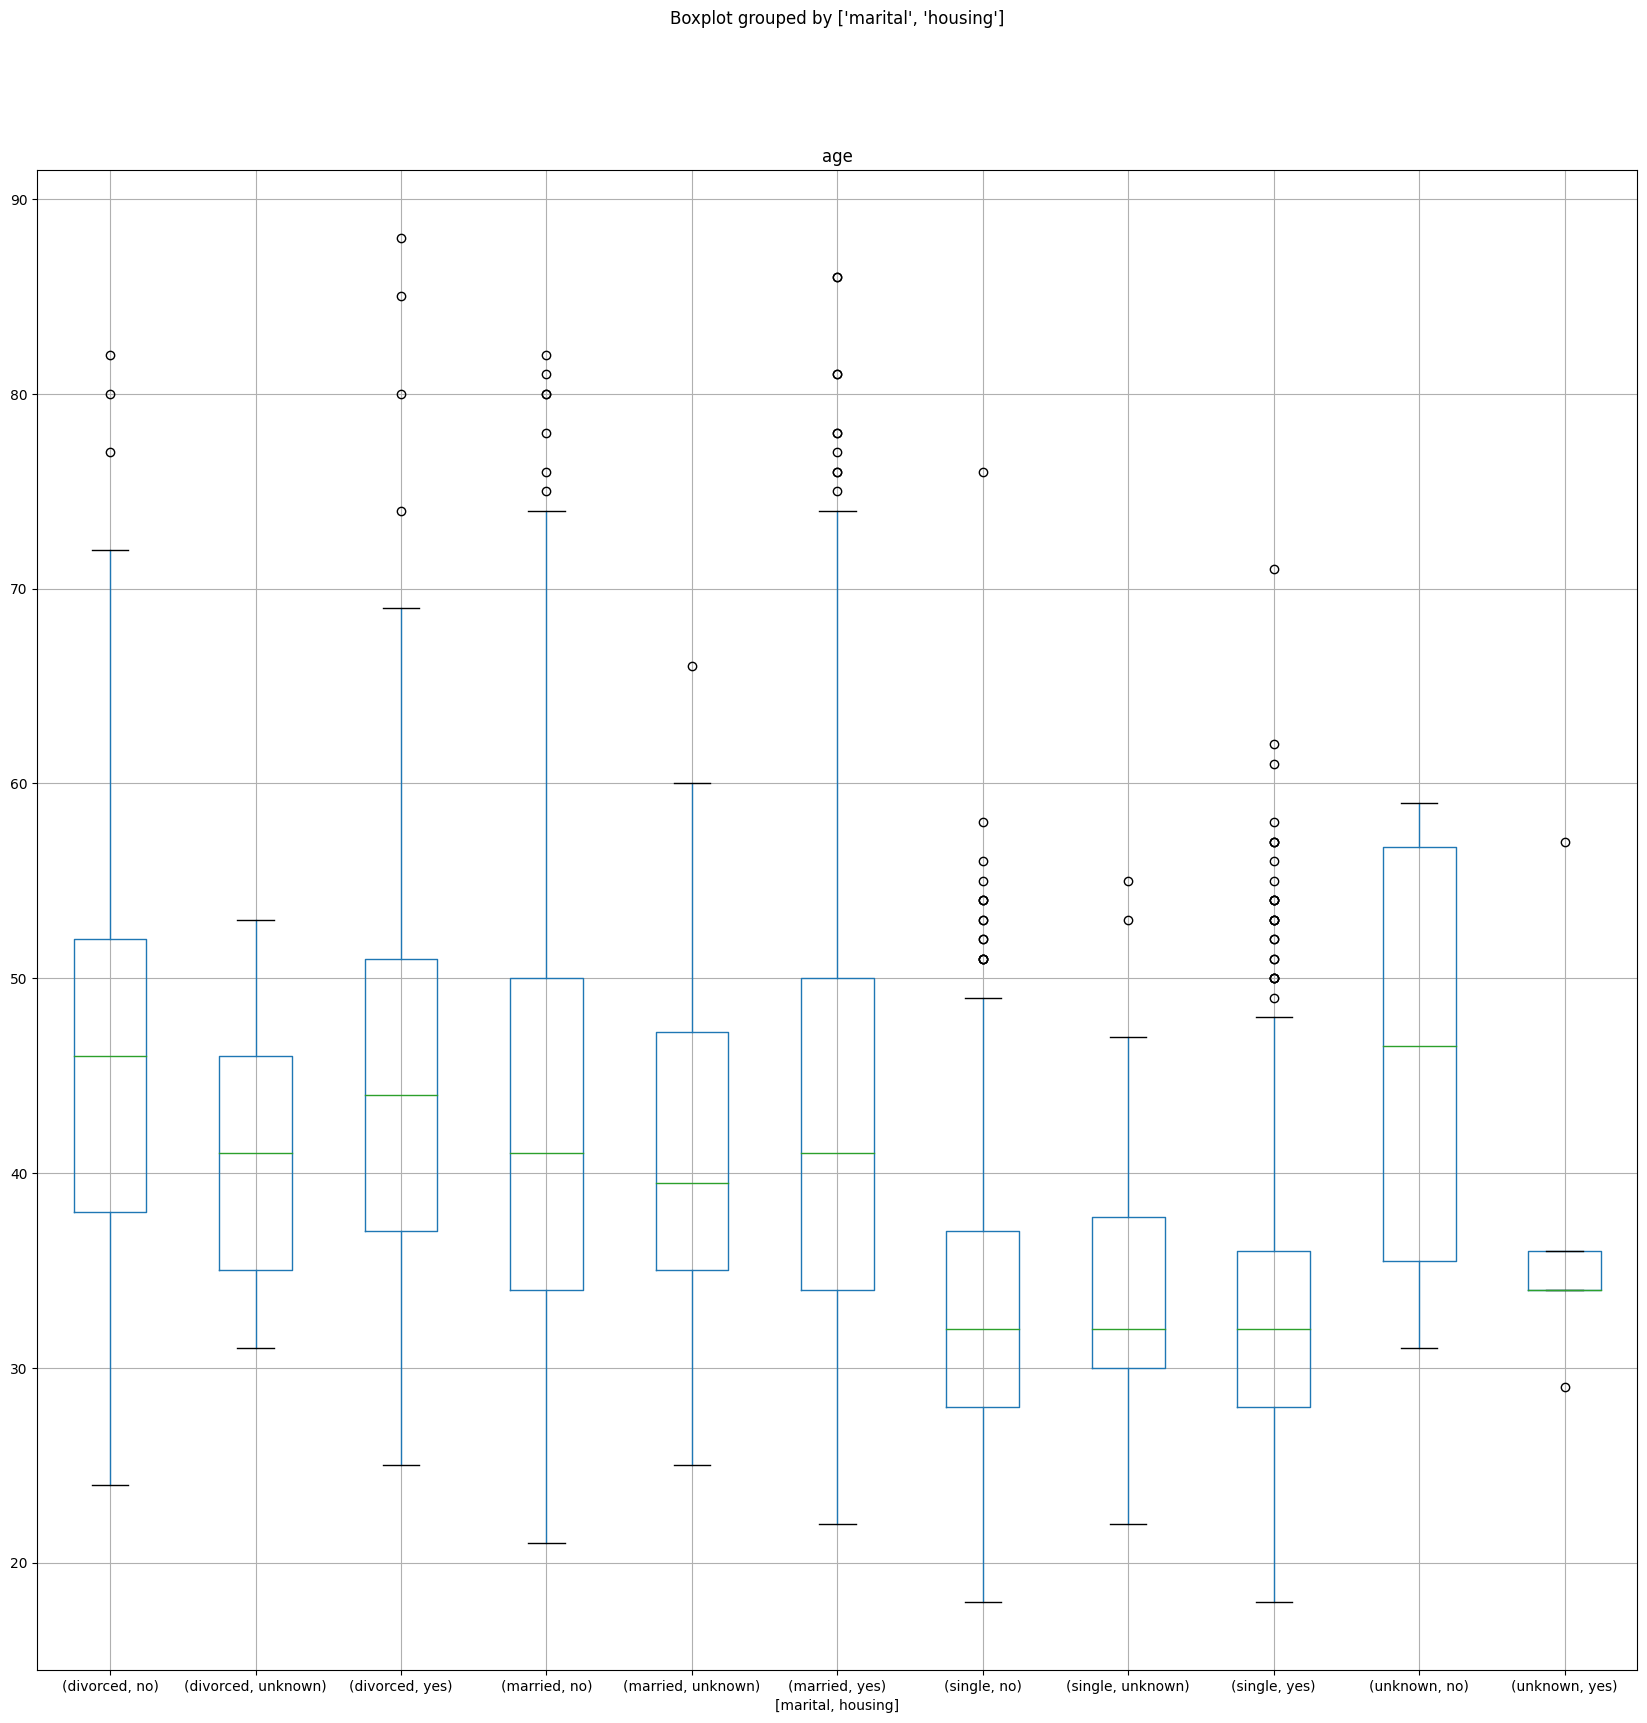

In [10]:
df.boxplot(column = "age",
           by = ["marital", "housing"],
           figsize = (20, 20))
plt.show()